# Boston_House_Price Prediction

In [1]:
import warnings

### Problem Statment

### Data Gathering

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston= load_boston()
dir(boston)

C:\Users\sai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [4]:
# boston.data

In [5]:
# boston.target

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
import numpy as np
import pandas as pd

df= pd.DataFrame(boston.data, columns= boston.feature_names)
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [8]:
df['PRICE'] = boston.target
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


#### All Data in Dataframe is 'Float', there is no object present. We check the description of data for further process,

# Feature Engineering

In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## We are Checking the data for OUTLIERS,

### Sensative to outliers-

1. Linear Regression
2. Logistic Regression
3. K-nearest Neighbour
4. Support Vector Machine
5. K-Means clustering

### Not Sensative to outliers-

1. Decision Tree
2. Random Forest
3. Adaboost
4. Gradient Boosting
5. XGBoost
6. Naive Bayes

### How to Detect outliers?

1. Z-score (normally distributed data)
2. IQR Method (skwed data)
3. Boxplot
4. Scatter Plot

### How to Handle Outlier?

1. Delete Observation
2. Imputation Technique:
    1. Median
    2. mean
    3. minumum value
    4. maximum value
    5. upper_tail
    6. lower_tail
    7. static value
    

3. Transformation Techniques:
    1. Log Transformation
    2. Square root transformation
    3. Cube root transformation
    4. Reciprocal Transformation
    5. Standardization

## 1. CRIM

In [11]:
df['CRIM'].describe().round(2)

count    506.00
mean       3.61
std        8.60
min        0.01
25%        0.08
50%        0.26
75%        3.68
max       88.98
Name: CRIM, dtype: float64

#### Outliers Detection

In [12]:
q1= df['CRIM'].quantile(0.25)
q2= df['CRIM'].quantile(0.50)
q3= df['CRIM'].quantile(0.75)

iqr = q3-q1

upper_tail= q3 + 2*iqr
lower_tail= q1 - 2*iqr

print('q1 :',q1)
print('q2 :',q2)
print('q3 :',q3)
print('iqr :',iqr)
print('upper_tail :', upper_tail)
print('lower_tail :', lower_tail)

q1 : 0.08204499999999999
q2 : 0.25651
q3 : 3.6770825
iqr : 3.5950375
upper_tail : 10.867157500000001
lower_tail : -7.10803


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CRIM'>

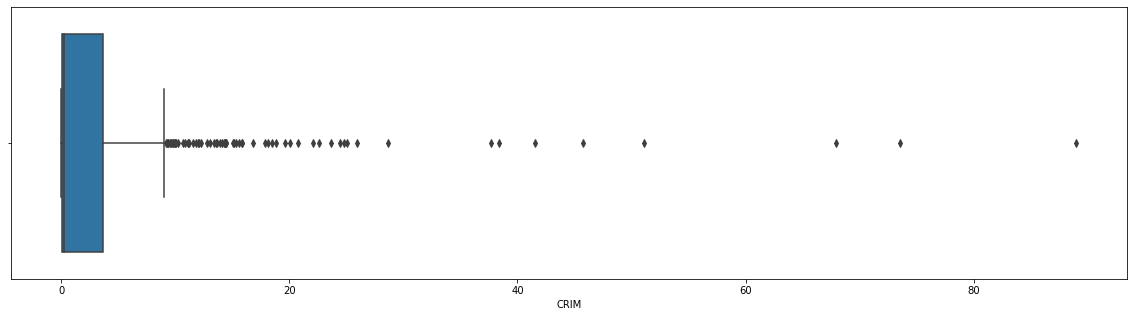

In [14]:
plt.figure(figsize=(20,5))
sns.boxplot(df['CRIM'])

In [15]:
without_out = df.loc[(df['CRIM']<=upper_tail) &
                    (df['CRIM']>=lower_tail)]

In [16]:
without_out['CRIM']

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 456, dtype: float64

In [17]:
# mean_CRIM = without_out['CRIM'].mean()
# mean_CRIM

In [18]:
median_CRIM = without_out['CRIM'].median()
median_CRIM

0.193625

In [19]:
outlier_CRIM = df.loc[(df['CRIM'] > upper_tail) |
                 (df['CRIM']< lower_tail)] 
outlier_CRIM['CRIM'].value_counts().sum()

50

### 50 Outliers Present In 'CRIM' column

### Outliers Replace by imputation Method (by median / mean / lower tail / upper tail /....),

In [20]:
df.loc[(df['CRIM'] > upper_tail) |
                 (df['CRIM']< lower_tail)] = median_CRIM

In [21]:
df.loc[(df['CRIM'] > upper_tail) |
                 (df['CRIM']< lower_tail)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [22]:
df['CRIM'].loc[(df['CRIM'] <= upper_tail) |
                 (df['CRIM']>= lower_tail)]

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

In [23]:
df['CRIM']

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: CRIM, Length: 506, dtype: float64

# 2. ZN

In [24]:
df['ZN'].describe()

count    506.000000
mean      11.382769
std       23.313182
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

In [25]:
q1 = df['ZN'].quantile(0.25)
q2 = df['ZN'].quantile(0.50)
q3 = df['ZN'].quantile(0.75)

iqr = q3-q2

upper_tail = q3 + 2*iqr
lower_tail = q1 - 2*iqr

print('q1 :',q1)
print('q2 :',q2)
print('q3 :',q3)
print('iqr :',iqr)
print('upper_tail :', upper_tail)
print('lower_tail :', lower_tail)

q1 : 0.0
q2 : 0.0
q3 : 12.5
iqr : 12.5
upper_tail : 37.5
lower_tail : -25.0


C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ZN'>

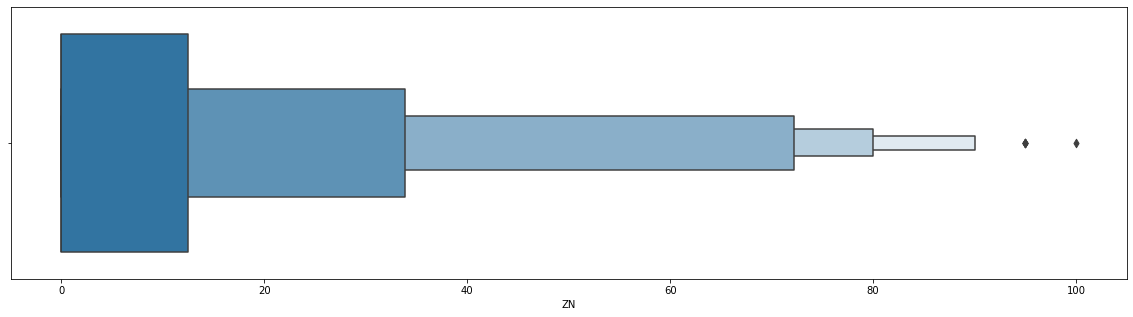

In [26]:
plt.figure(figsize=(20,5))
sns.boxenplot(df['ZN'])

In [27]:
without_outlier = df.loc[(df['ZN']<=upper_tail) &
                        (df['ZN']>=lower_tail)]
without_outlier['ZN'].value_counts().sum()

448

In [28]:
outliers =  df.loc[(df['ZN'] > upper_tail) |
                        (df['ZN'] < lower_tail)]
outliers.value_counts().sum()

58

In [29]:
# median_ZN = without_outlier['ZN'].median()
# median_ZN

In [30]:
mean_ZN = without_outlier['ZN'].mean()
mean_ZN

3.899958147321441

In [31]:
df.loc[(df['ZN'] > upper_tail) |
        (df['ZN'] < lower_tail)] = mean_ZN

In [32]:
outliers =  df.loc[(df['ZN'] > upper_tail) |
                        (df['ZN'] < lower_tail)]
outliers.value_counts().sum()

0

In [33]:
without_outlier = df.loc[(df['ZN']<=upper_tail) &
                        (df['ZN']>=lower_tail)]
without_outlier['ZN'].value_counts().sum()

506

# 3. INDUS

In [34]:
df['INDUS'].describe()

count    506.000000
mean       9.462547
std        7.040466
min        0.193625
25%        3.899958
50%        7.380000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64

In [35]:
q1= df['INDUS'].quantile(0.25)
q2= df['INDUS'].quantile(0.50)
q3= df['INDUS'].quantile(0.75)

iqr = q3-q1

upper_tail= q3 + 2*iqr
lower_tail= q1 - 2*iqr

print('q1 :',q1)
print('q2 :',q2)
print('q3 :',q3)
print('iqr :',iqr)
print('upper_tail :', upper_tail)
print('lower_tail :', lower_tail)

q1 : 3.899958147321441
q2 : 7.38
q3 : 18.1
iqr : 14.20004185267856
upper_tail : 46.50008370535712
lower_tail : -24.500125558035677


C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='INDUS'>

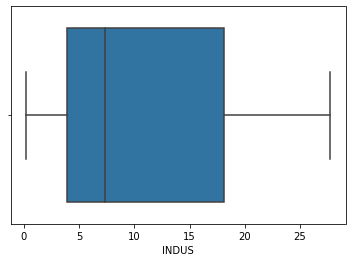

In [36]:
sns.boxplot(df['INDUS'])

In [37]:
outliers = df.loc[(df['INDUS']<lower_tail) |
                 (df['INDUS']>upper_tail)]
outliers.value_counts().sum()

0

#### There is no Outliers show in Boxplot and outliers variable also.

# 4. CHAS

In [38]:
df['CHAS'].describe()

count    506.000000
mean       0.527429
std        1.238233
min        0.000000
25%        0.000000
50%        0.000000
75%        0.193625
max        3.899958
Name: CHAS, dtype: float64

In [39]:
q1= df['CHAS'].quantile(0.25)
q2= df['CHAS'].quantile(0.50)
q3= df['CHAS'].quantile(0.75)

iqr = q3-q1

upper_tail= q3 + 2*iqr
lower_tail= q1 - 2*iqr

print('q1 :',q1)
print('q2 :',q2)
print('q3 :',q3)
print('iqr :',iqr)
print('upper_tail :', upper_tail)
print('lower_tail :', lower_tail)

q1 : 0.0
q2 : 0.0
q3 : 0.193625
iqr : 0.193625
upper_tail : 0.580875
lower_tail : -0.38725


C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CHAS'>

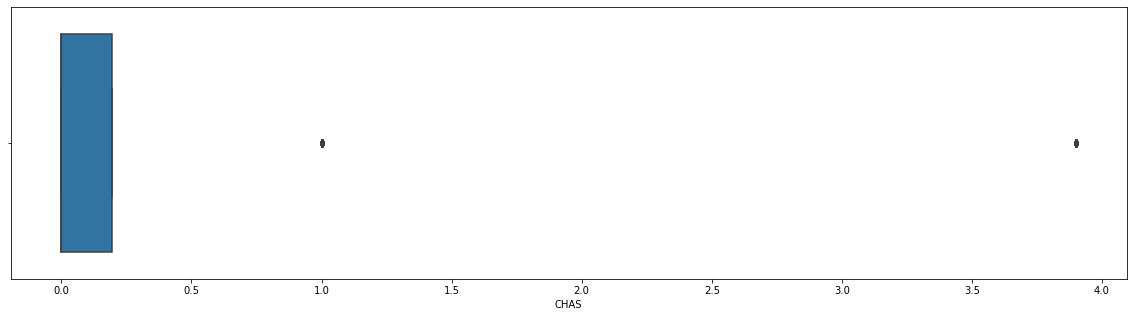

In [40]:
plt.figure(figsize=(20,5))
sns.boxplot(df['CHAS'])

In [41]:
outliers = df.loc[(df['CHAS']<lower_tail) |
                 (df['CHAS']>upper_tail)]
outliers.value_counts().sum()

89

### Detect 89 outliers in CHAS columns

In [42]:
without_outliers = df['CHAS'].loc[(df['CHAS']>=lower_tail) &
                 (df['CHAS']<=upper_tail)]
without_outliers.value_counts().sum()

417

In [43]:
# median_CHAS = without_outliers.median()
# median_CHAS

In [44]:
mean_CHAS = without_outliers.mean()
mean_CHAS

0.023216426858513203

### Imputing outliers by mean value,

In [45]:
df.loc[(df['CHAS']<lower_tail) |
       (df['CHAS']>upper_tail)]= mean_CHAS

In [46]:
df.loc[(df['CHAS']<lower_tail) |
       (df['CHAS']>upper_tail)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [47]:
without_outliers = df['CHAS'].loc[(df['CHAS']>=lower_tail) &
                 (df['CHAS']<=upper_tail)]
without_outliers.value_counts().sum()

506

# 5. NOX

In [49]:
df['NOX'].describe()

count    506.000000
mean       0.426065
std        0.233109
min        0.023216
25%        0.193625
50%        0.491000
75%        0.583000
max        0.871000
Name: NOX, dtype: float64

In [51]:
q1= df['NOX'].quantile(0.25)
q2= df['NOX'].quantile(0.50)
q3= df['NOX'].quantile(0.75)

iqr = q3 -q1

upper_tail= q3 + 2*iqr
lower_tail= q1 - 2*iqr

print('q1 :',q1)
print('q2 :',q2)
print('q3 :',q3)
print('iqr :',iqr)
print('upper_tail :', upper_tail)
print('lower_tail :', lower_tail)

q1 : 0.193625
q2 : 0.491
q3 : 0.583
iqr : 0.38937499999999997
upper_tail : 1.3617499999999998
lower_tail : -0.5851249999999999


C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NOX'>

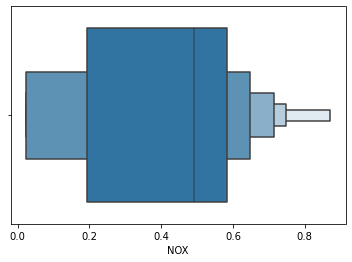

In [52]:
sns.boxenplot(df['NOX'])

In [55]:
outliers = df.loc[(df['NOX']>= upper_tail) |
                 (df['NOX'] <= lower_tail)]
outliers

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [59]:
without_outliers = df.loc[(df['NOX']> lower_tail) &
                         (df['NOX']<upper_tail)]
without_outlier['NOX'].value_counts().sum()

506

In [ ]:
There is No outliers in NOX column

# 6. RM

In [58]:
df['RM'].describe()

count    506.000000
mean       4.572116
std        2.817610
min        0.023216
25%        0.193625
50%        5.967000
75%        6.396750
max        8.725000
Name: RM, dtype: float64

In [60]:
q1 = df['RM'].quantile(0.25)
q2 = df['RM'].quantile(0.50)
q3 = df['RM'].quantile(0.75)

iqr = q3-q1

upper_tail = q3 + 2*iqr
lower_tail = q1 - 2*iqr

print('q1 :',q1)
print('q2 :',q2)
print('q3 :',q3)
print('iqr :',iqr)
print('upper_tail :', upper_tail)
print('lower_tail :', lower_tail)

q1 : 0.193625
q2 : 5.9670000000000005
q3 : 6.39675
iqr : 6.203125
upper_tail : 18.803
lower_tail : -12.212625


C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RM'>

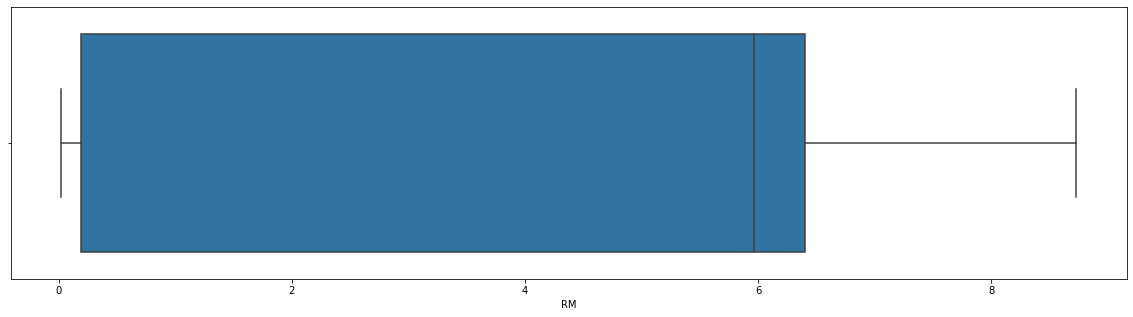

In [62]:
plt.figure(figsize=(20,5))
sns.boxplot(df['RM'])

In [63]:
outliers = df.loc[(df['RM']< lower_tail) |
                 df['RM']> upper_tail]
outliers['RM'].value_counts().sum()

0

In [65]:
without_outlier = df.loc[(df['RM'] > lower_tail) &
                        (df['RM'] < upper_tail)]
without_outlier.value_counts().sum()

506

In [ ]:
There is No outliers detect in RM column

# 7. AGE

In [67]:
df['AGE'].describe()

count    506.000000
mean      50.823414
std       38.506486
min        0.023216
25%        0.193625
50%       58.600000
75%       88.150000
max      100.000000
Name: AGE, dtype: float64

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

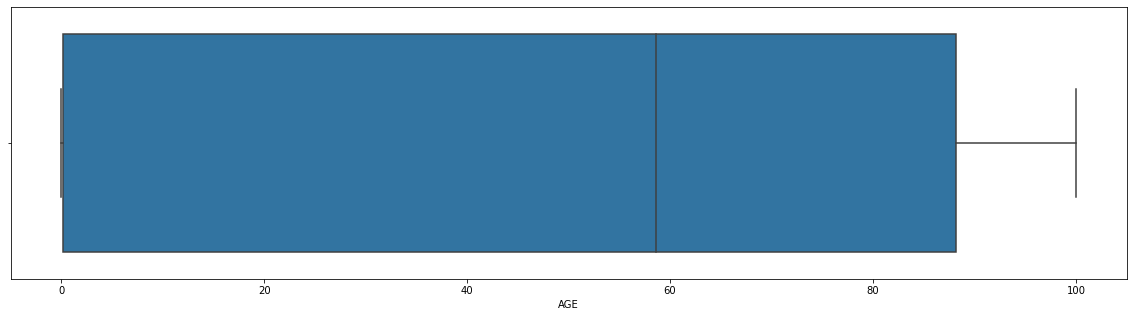

In [69]:
plt.figure(figsize= (20,5))
sns.boxplot(df['AGE'])

In [71]:
q1= df['AGE'].quantile(0.25)
q2= df['AGE'].quantile(0.50)
q3= df['AGE'].quantile(0.75)

iqr= q3-q1

upper_tail= q3 + 2*iqr
lower_tail= q1 - 2*iqr

print('q1 :',q1)
print('q2 :',q2)
print('q3 :',q3)
print('iqr :',iqr)
print('upper_tail :', upper_tail)
print('lower_tail :', lower_tail)

q1 : 0.193625
q2 : 58.6
q3 : 88.15
iqr : 87.95637500000001
upper_tail : 264.06275000000005
lower_tail : -175.71912500000002


In [76]:
outliers = df.loc[(df['AGE']<lower_tail) |
                 (df['AGE'] > upper_tail)]
outliers['AGE'].value_counts().sum()

0

In [80]:
without_outlier = df.loc[(df['AGE'] > lower_tail) &
                        (df['AGE'] < upper_tail)]
without_outlier['AGE'].value_counts().sum()

506

# 8. DIS

In [81]:
df['DIS'].describe()

count    506.000000
mean       2.676684
std        2.189463
min        0.023216
25%        0.193625
50%        2.421800
75%        4.019575
max        9.222900
Name: DIS, dtype: float64

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIS'>

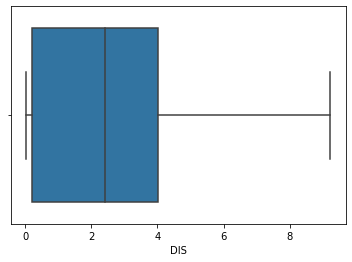

In [82]:
sns.boxplot(df['DIS'])

# 9. RAD     

In [83]:
df['RAD'].describe()

count    506.000000
mean       6.179343
std        7.728010
min        0.023216
25%        0.193625
50%        4.000000
75%        6.000000
max       24.000000
Name: RAD, dtype: float64

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RAD'>

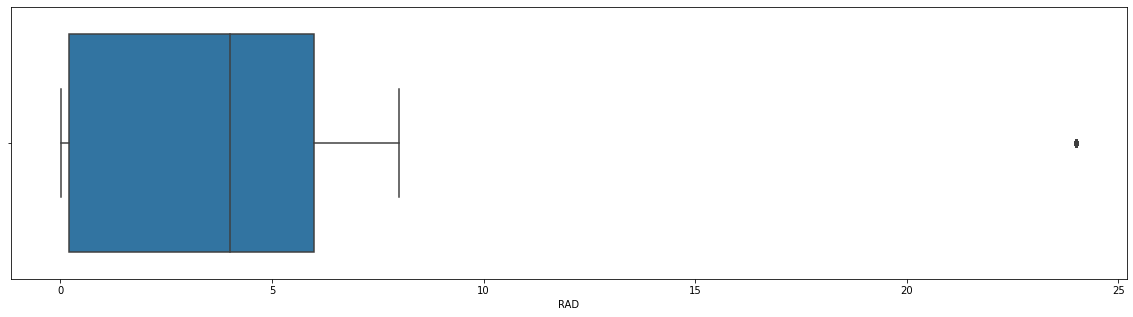

In [87]:
plt.figure(figsize=(20,5))
sns.boxplot(df["RAD"])

In [88]:
q1= df['RAD'].quantile(0.25)
q2 =df['RAD'].quantile(0.50)
q3 = df['RAD'].quantile(0.75)

iqr = q3 - q1

upper_tail= q3 + 2*iqr
lower_tail= q1 - 2*iqr

print('q1 :',q1)
print('q2 :',q2)
print('q3 :',q3)
print('iqr :',iqr)
print('upper_tail :', upper_tail)
print('lower_tail :', lower_tail)

q1 : 0.193625
q2 : 4.0
q3 : 6.0
iqr : 5.806375
upper_tail : 17.61275
lower_tail : -11.419125


In [90]:
outliers = df.loc[(df['RAD']<lower_tail) |
                 (df['RAD']>upper_tail)]
outliers['RAD']

359    24.0
360    24.0
361    24.0
362    24.0
365    24.0
       ... 
483    24.0
484    24.0
485    24.0
486    24.0
487    24.0
Name: RAD, Length: 74, dtype: float64

In [91]:
outliers['RAD'].value_counts().sum()

74

In [92]:
without_outlier = df.loc[(df['RAD'] > lower_tail) &
                        (df['RAD'] < upper_tail)]
without_outlier['RAD']

0      1.0
1      2.0
2      2.0
3      3.0
4      3.0
      ... 
501    1.0
502    1.0
503    1.0
504    1.0
505    1.0
Name: RAD, Length: 432, dtype: float64

In [94]:
without_outlier['RAD'].value_counts().sum()

432

In [95]:
mean = without_outlier['RAD'].mean()
mean

3.126730351829654

In [96]:
median = without_outlier['RAD'].median()
median

4.0

In [97]:
df.loc[(df['RAD']<lower_tail) |
                 (df['RAD']>upper_tail)] = median

In [101]:
df['RAD'].loc[(df['RAD']<lower_tail) |
                 (df['RAD']>upper_tail)].value_counts().sum()

0

In [103]:
without_outlier = df.loc[(df['RAD'] > lower_tail) &
                        (df['RAD'] < upper_tail)]
without_outlier['RAD'].value_counts().sum()

506

# 10. TAX

In [104]:
df['TAX'].describe()

count    506.000000
mean     184.997525
std      169.677074
min        0.023216
25%        0.193625
50%      233.000000
75%      307.000000
max      711.000000
Name: TAX, dtype: float64

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TAX'>

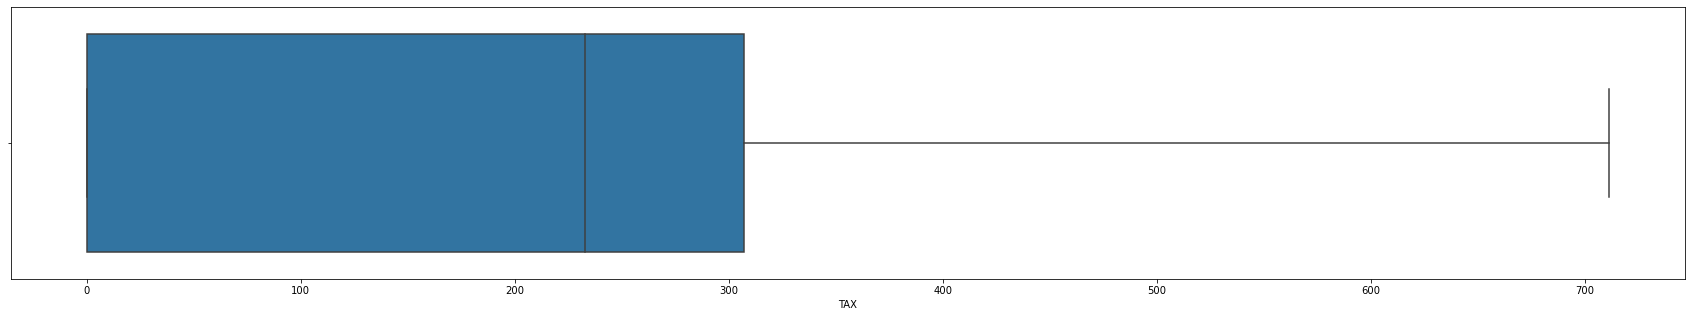

In [109]:
plt.figure(figsize=(30,5))
sns.boxplot(df['TAX'])

# 11. PTRATIO

In [111]:
df['PTRATIO'].describe()

count    506.000000
mean      11.126576
std        8.512400
min        0.023216
25%        0.193625
50%       15.200000
75%       18.700000
max       21.200000
Name: PTRATIO, dtype: float64

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PTRATIO'>

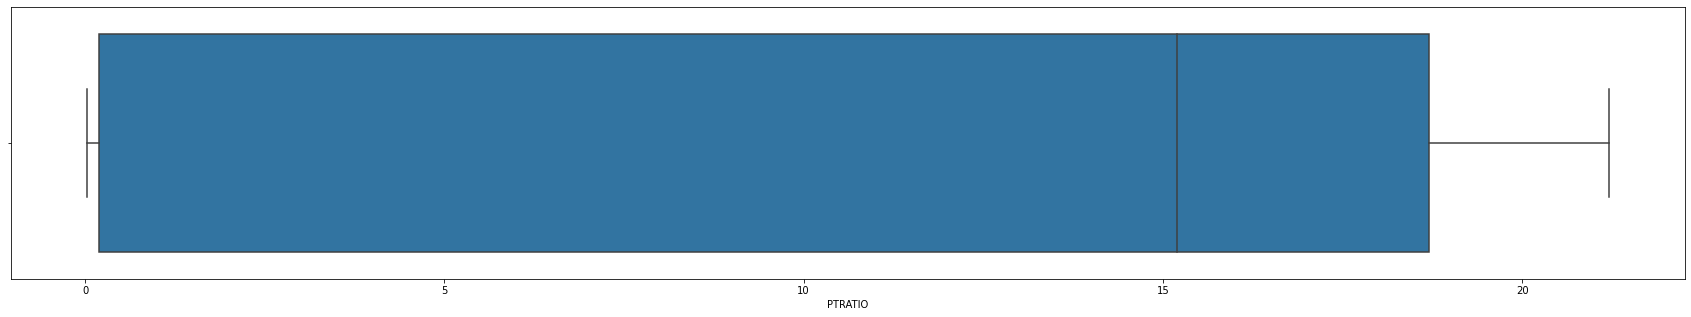

In [113]:
plt.figure(figsize=(30,5))
sns.boxplot(df['PTRATIO'])

# 12. B

In [114]:
df['B'].describe()

count    506.000000
mean     220.714165
std      189.640478
min        0.023216
25%        0.193625
50%      372.620000
75%      393.725000
max      396.900000
Name: B, dtype: float64

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='B'>

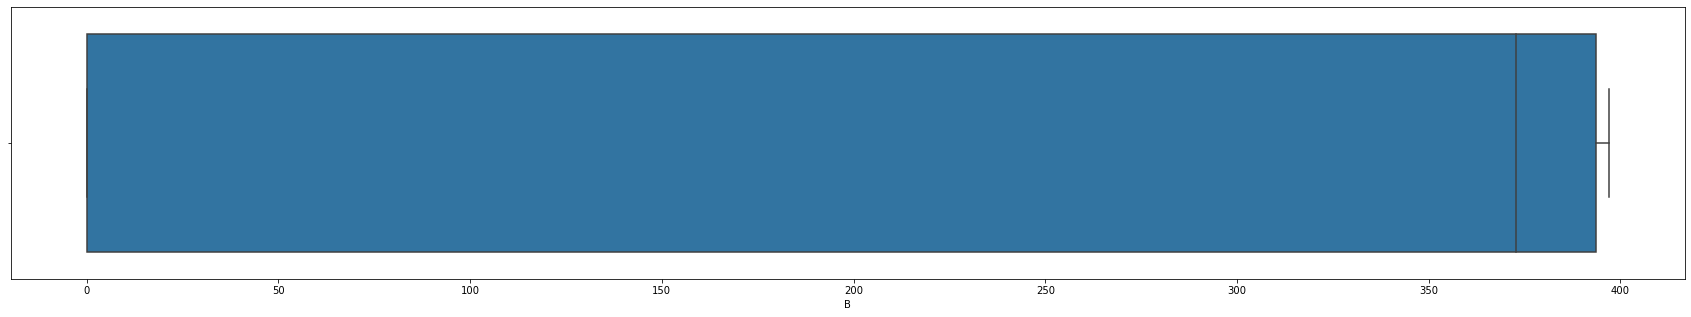

In [116]:
plt.figure(figsize=(30,5))
sns.boxplot(df['B'])

# 13. LSTAT

In [117]:
df['LSTAT'].describe()

count    506.000000
mean       7.162861
std        6.738604
min        0.023216
25%        0.193625
50%        5.510000
75%       11.195000
max       34.410000
Name: LSTAT, dtype: float64

<AxesSubplot:xlabel='LSTAT', ylabel='Density'>

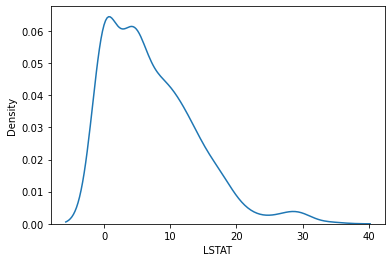

In [147]:
sns.kdeplot(df['LSTAT'])

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LSTAT'>

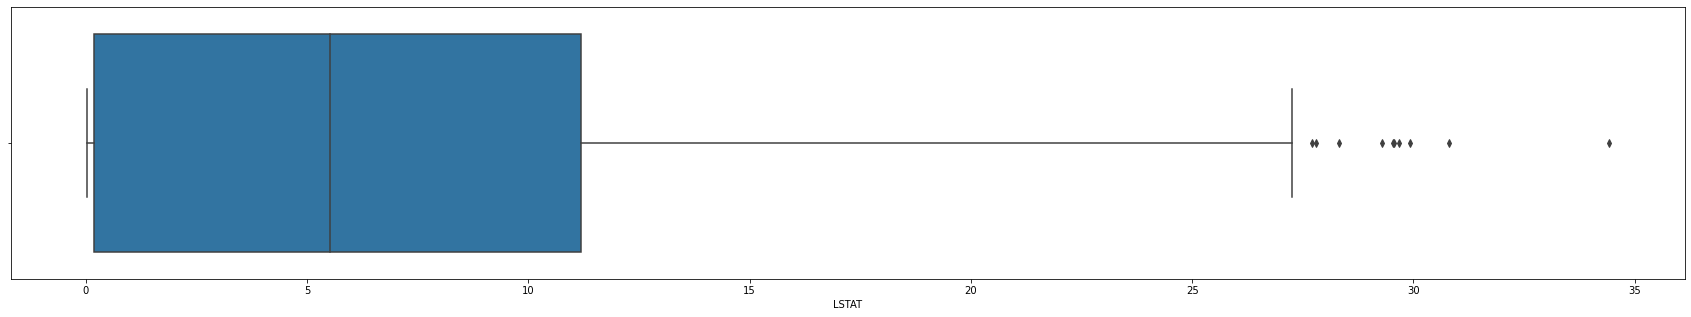

In [119]:
plt.figure(figsize=(30,5))
sns.boxplot(df['LSTAT'])

In [139]:
q1 = df['LSTAT'].quantile(0.25)
q2 = df['LSTAT'].quantile(0.50)
q3 = df['LSTAT'].quantile(0.75)

iqr = q3 - q1

upper_tail= q3 + 1.5*iqr
lower_tail= q1 - 1.5*iqr

print('q1 :',q1)
print('q2 :',q2)
print('q3 :',q3)
print('iqr :',iqr)
print('upper_tail :', upper_tail)
print('lower_tail :', lower_tail)

q1 : 0.193625
q2 : 5.51
q3 : 11.195
iqr : 11.001375
upper_tail : 27.6970625
lower_tail : -16.3084375


In [141]:
outliers = df.loc[(df['LSTAT'] > upper_tail)]
outliers['LSTAT']

8      29.93
32     27.71
48     30.81
141    34.41
144    29.29
145    27.80
147    29.53
148    28.32
214    29.55
490    29.68
Name: LSTAT, dtype: float64

In [143]:
outliers['LSTAT'].value_counts().sum()

10

In [149]:
without_outliers = df.loc[(df['LSTAT'] > lower_tail) &
                         (df['LSTAT'] < upper_tail)]
without_outliers['LSTAT']

0      4.98
1      9.14
2      4.03
3      2.94
4      5.33
       ... 
501    9.67
502    9.08
503    5.64
504    6.48
505    7.88
Name: LSTAT, Length: 496, dtype: float64

In [150]:
mean= without_outliers['LSTAT'].mean()
mean

6.7084224032064625

In [151]:
 df.loc[(df['LSTAT'] > upper_tail)] = mean

In [154]:
 df['LSTAT'].loc[(df['LSTAT'] > upper_tail)].value_counts().sum()

0

### 1. Log Transformation

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LSTAT'>

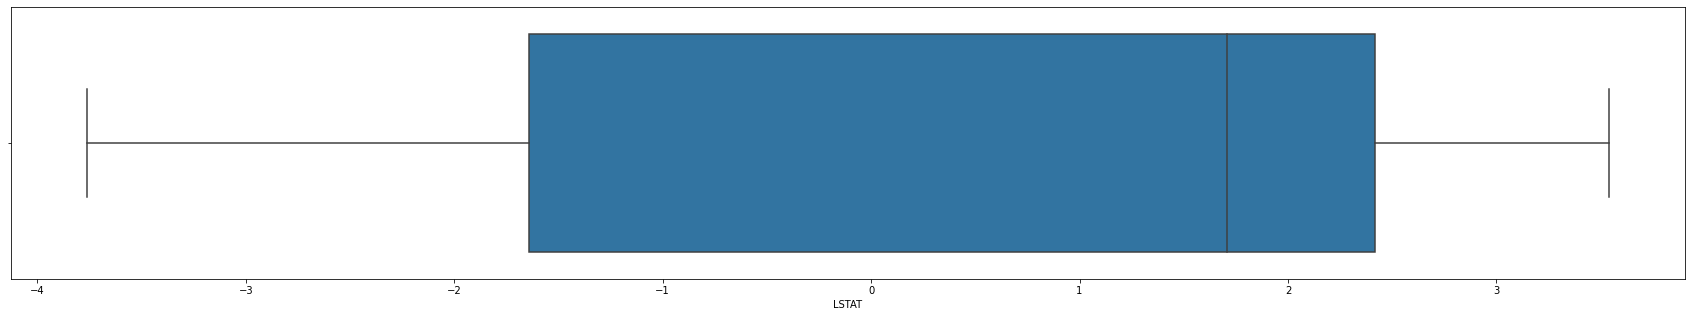

In [121]:
plt.figure(figsize=(30,5))
sns.boxplot(np.log(df['LSTAT']))

In [123]:
lg = np.log(df['LSTAT'])
lg

0      1.605430
1      2.212660
2      1.393766
3      1.078410
4      1.673351
         ...   
501    2.269028
502    2.206074
503    1.729884
504    1.868721
505    2.064328
Name: LSTAT, Length: 506, dtype: float64

### 2. Cube Root Transformation

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LSTAT'>

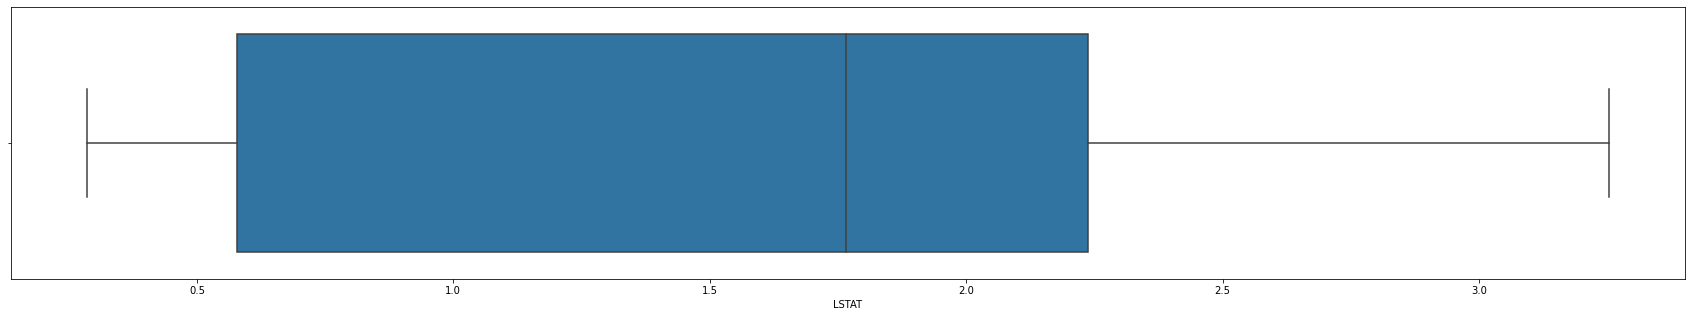

In [124]:
plt.figure(figsize=(30,5))
sns.boxplot(np.cbrt(df['LSTAT']))

In [126]:
cb = np.cbrt(df['LSTAT'])
cb

0      1.707693
1      2.090814
2      1.591360
3      1.432570
4      1.746797
         ...   
501    2.130470
502    2.086229
503    1.780026
504    1.864340
505    1.989950
Name: LSTAT, Length: 506, dtype: float64

### 3. Square Root Trans.

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LSTAT'>

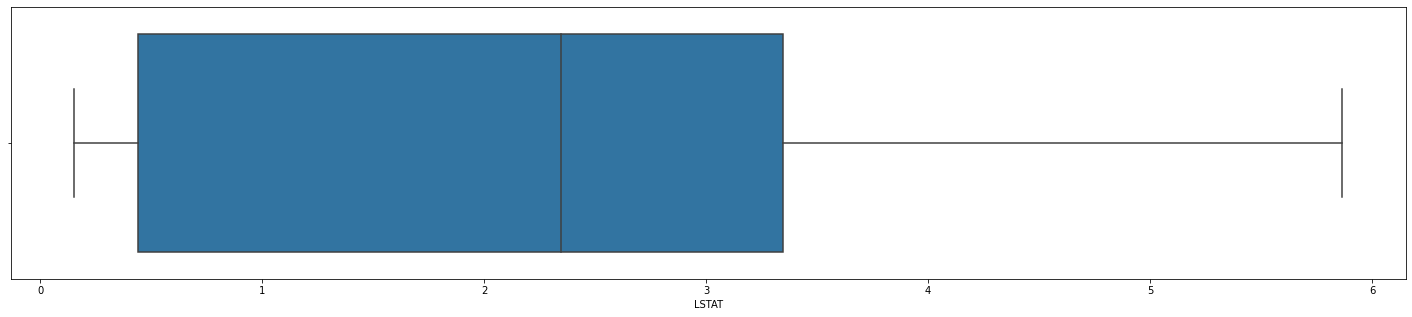

In [130]:
plt.figure(figsize=(25,5))
sns.boxplot(np.sqrt(df['LSTAT']))

### 4. Reciprocal Transformation

C:\Users\sai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LSTAT'>

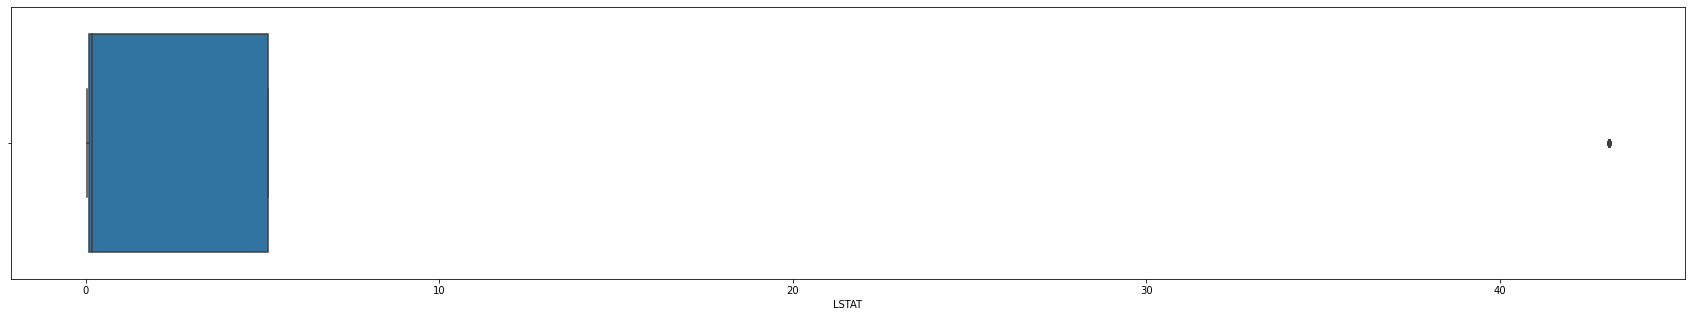

In [138]:
plt.figure(figsize=(30,5))
sns.boxplot(1/df['LSTAT'])

### 5. Standardization

### . boxcox

<AxesSubplot:>

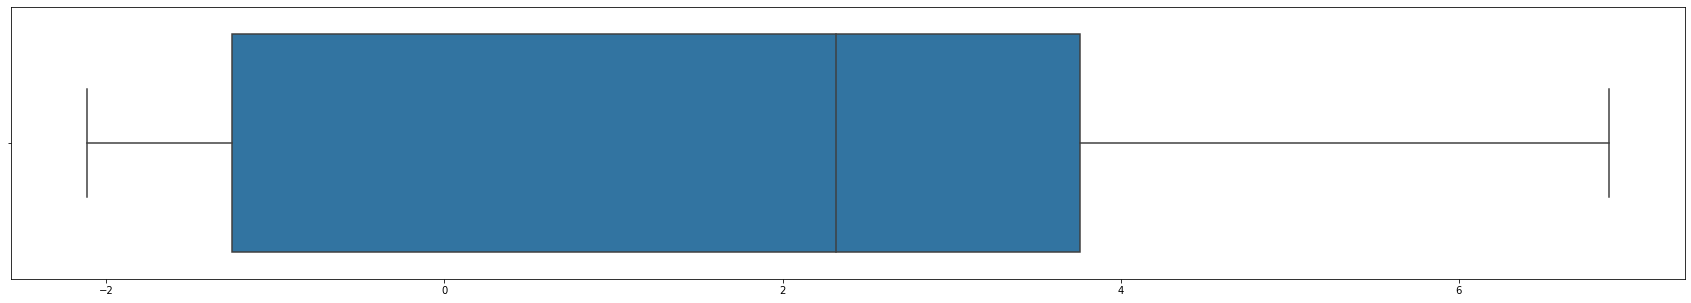

In [137]:
from scipy.stats import boxcox

plt.figure(figsize=(30,5))
sns.boxplot(boxcox(df['LSTAT'])[0])

In [155]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Feature selection

In [162]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.002466,0.037356,0.957973,0.969403,0.107556,-0.245510,0.281310,0.295018,-0.337671,-0.254326,-0.408558,-0.048482,-0.262974
ZN,-0.002466,1.000000,-0.056252,0.018178,0.049865,0.336456,0.066815,0.493694,0.387942,0.155165,0.217494,0.268133,0.092439,0.330586
INDUS,0.037356,-0.056252,1.000000,-0.114937,-0.000939,0.587583,0.697642,0.236905,0.456914,0.724784,0.649372,0.576989,0.747568,0.434897
CHAS,0.957973,0.018178,-0.114937,1.000000,0.988319,0.013348,-0.396827,0.273327,0.205234,-0.466218,-0.349733,-0.497343,-0.179106,-0.349870
NOX,0.969403,0.049865,-0.000939,0.988319,1.000000,0.156204,-0.268760,0.363872,0.324643,-0.337006,-0.213138,-0.368859,-0.053685,-0.229812
RM,0.107556,0.336456,0.587583,0.013348,0.156204,1.000000,0.724524,0.752424,0.837802,0.769796,0.888150,0.839317,0.687543,0.865719
AGE,-0.245510,0.066815,0.697642,-0.396827,-0.268760,0.724524,1.000000,0.260204,0.521330,0.841717,0.821755,0.816461,0.809058,0.703110
DIS,0.281310,0.493694,0.236905,0.273327,0.363872,0.752424,0.260204,1.000000,0.730240,0.418168,0.611973,0.532239,0.440216,0.511577
RAD,0.295018,0.387942,0.456914,0.205234,0.324643,0.837802,0.521330,0.730240,1.000000,0.614196,0.680672,0.607133,0.572828,0.648236
TAX,-0.337671,0.155165,0.724784,-0.466218,-0.337006,0.769796,0.841717,0.418168,0.614196,1.000000,0.909143,0.907509,0.782193,0.758009


<AxesSubplot:>

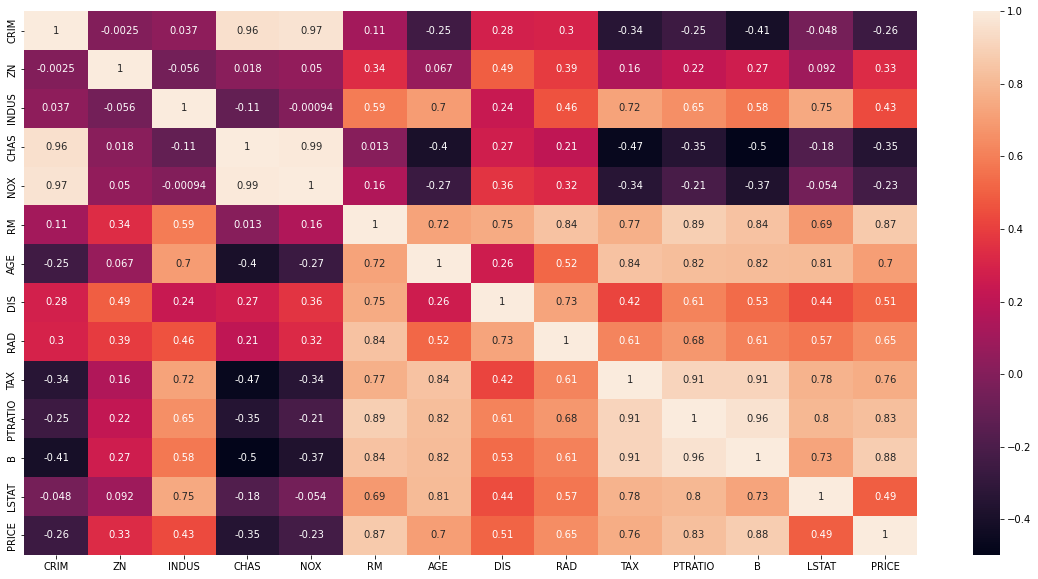

In [166]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

# Model Training

# Linear Regression

In [167]:
from sklearn.linear_model import LinearRegression

In [169]:
LR = LinearRegression()

In [170]:
from sklearn.model_selection import train_test_split

In [174]:
x= df.drop('PRICE', axis=1)
y= df['PRICE']

In [177]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state= 15)

In [179]:
# y_train

In [176]:
LR.fit(x_train, y_train)

LinearRegression()

In [186]:
# Evaluation for Training

y_pred_train = LR.predict(x_train)

from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score

MSE = mse(y_train, y_pred_train)
print('MSE :', MSE)

RMSE = np.sqrt(MSE)
print('RMSE :', RMSE)

MAE = mae(y_train, y_pred_train)
print('MAE :', MAE)

r2 = r2_score(y_train, y_pred_train)
print('r2 (accuracy) :', r2)

MSE : 4.404547385571444
RMSE : 2.0987013569280037
MAE : 1.1853908511023694
r2 (accuracy) : 0.9718073968085531


In [182]:
# Evaluation for Testing

y_pred_test = LR.predict(x_test)

MSE = mse(y_test, y_pred_test)
print('MSE :', MSE)

RMSE = np.sqrt(MSE)
print('RMSE :', RMSE)

MAE = mae(y_test, y_pred_test)
print('MAE :', MAE)

r2 = r2_score(y_test, y_pred_test)
print('r2 (accuracy) :', r2)

MSE : 6.220158620573895
RMSE : 2.494024582993098
MAE : 1.3179366188484887
r2 (accuracy) : 0.9617217010211614


# KNN Regression

In [183]:
from sklearn.neighbors import KNeighborsRegressor

In [184]:
KNN = KNeighborsRegressor()
KNN.fit(x_train, y_train)

KNeighborsRegressor()

In [189]:
# Evaluation for Training

y_pred_train = KNN.predict(x_train)

MSE = mse(y_train, y_pred_train)
print('MSE :', MSE)

RMSE = np.sqrt(MSE)
print('RMSE :', RMSE)

MAE = mae(y_train, y_pred_train)
print('MAE :', MAE)

r2 = r2_score(y_train, y_pred_train)
print('r2 (accuracy) :', r2)

MSE : 13.018237467018471
RMSE : 3.608079470718248
MAE : 1.889604221635884
r2 (accuracy) : 0.916672935711404


In [190]:
# Evaluation for Testing

y_pred_test = KNN.predict(x_test)

MSE = mse(y_test, y_pred_test)
print('MSE :', MSE)

RMSE = np.sqrt(MSE)
print('RMSE :', RMSE)

MAE = mae(y_test, y_pred_test)
print('MAE :', MAE)

r2 = r2_score(y_test, y_pred_test)
print('r2 (accuracy) :', r2)

MSE : 22.197108661417328
RMSE : 4.7113807595456905
MAE : 2.542047244094488
r2 (accuracy) : 0.8634009816088732


### Hyperparameter Tuning

In [ ]:
#Pending

## Scaling

# 1. Normalisation

In [191]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### For Training Data Evaluation

In [208]:
#For Training Evaluation

ns = MinMaxScaler()
ns.fit(x_train)

array_train = ns.transform(x_train)

ns_x_train = pd.DataFrame(array_train, columns = x_train.columns)
ns_x_train.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.002521,0.000663,0.000000,0.003461,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.043549,0.000000,0.222854,0.000000,0.071918,0.880599,0.169807,0.377316,1.0,0.431768,0.820558,0.951144,0.147623


In [ ]:
KNN_NS = KNeighborsRegressor()
KNN_NS.fit(NS_x_train, y_train)

In [206]:

y_pred_train = KNN_NS.predict(NS_x_train)

MSE = mse(y_train, y_pred_train)
print('MSE :', MSE)

RMSE = np.sqrt(MSE)
print('RMSE', RMSE)

MAE = mae(y_train, y_pred_train)
print('MAE :', MAE)

r2 = r2_score(y_train, y_pred_train)
print('r2 :', r2)

MSE : 6.44292031662269
RMSE 2.538290825855597
MAE : 1.3032717678100263
r2 : 0.9587601903260966


## Training >>> r2= 0.916,    r2_NS = 0.958

### For Testing Data Evaluation

In [210]:
#For Testing Evaluation
array_test = ns.transform(x_test)

ns_x_test = pd.DataFrame(array_test, columns = x_test.columns)
ns_x_test.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.004334,0.971429,0.218885,0.0,0.061297,0.754648,0.403862,0.615579,0.874636,0.462711,0.759170,0.997102,0.359013
1,0.076665,0.571429,0.142397,0.0,0.093308,0.962421,0.914980,0.254999,0.623909,0.371287,0.612784,0.974702,0.223011


In [213]:
y_pred_test = KNN_NS.predict(ns_x_test)

MSE = mse(y_test, y_pred_test)
print('MSE :', MSE)

RMSE= np.sqrt(MSE)
print('RMSE :', RMSE)

MAE = mae(y_test, y_pred_test)
print('MAE :', MAE)

r2 = r2_score(y_test, y_pred_test)
print("r2 :",r2)

MSE : 16.445700787401577
RMSE : 4.0553299233726445
MAE : 1.9644094488188975
r2 : 0.8987946304818515


## Testing >>> r2= 0.863, r2_NS = 0.898

# 2. Standardization

In [216]:
std = StandardScaler()
std.fit(x_train)

StandardScaler()

### For Training Data Evaluation

In [219]:
array_train = std.transform(x_train)
std_x_train = pd.DataFrame(array_train, columns = x_train.columns)

std_x_train.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.593329,-0.486922,-0.988351,-0.445590,-0.672654,-1.609365,-1.005500,-1.372028,-1.449435,-1.074048,-1.322573,-1.147371,-1.151767
1,-0.424957,-0.489693,0.026164,-0.459529,-0.361634,1.218098,-0.552107,0.153567,1.954594,0.730332,0.743327,0.835310,-0.488732


In [220]:
KNN_std = KNeighborsRegressor()
KNN_std.fit(std_x_train, y_train)

KNeighborsRegressor()

In [223]:
y_pred_train = KNN_std.predict(std_x_train)

MSE = mse(y_train, y_pred_train)
print('MSE :', MSE)

RMSE = np.sqrt(MSE)
print('RMSE :', RMSE)

MAE = mae(y_train, y_pred_train)
print('MAE :', MAE)

r2= r2_score(y_train, y_pred_train)
print('r2 :', r2)

MSE : 5.7091218997361475
RMSE : 2.3893768852435455
MAE : 1.2398416886543537
r2 : 0.9634570832821273


## Training >>> r2_LR=0.972, r2_KNN= 0.916, KNN_ns = 0.958, KNN_std= 0.963

### For Testing Data Evaluation

In [228]:
array_test = std.transform(x_test)
std_x_test = pd.DataFrame(array_test, columns= x_test.columns)
std_x_test.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.585887,3.568103,0.008096,-0.459529,-0.407564,0.813689,0.072828,1.116928,1.527852,0.859646,0.588772,0.931112,0.460702
1,-0.289052,1.897246,-0.340106,-0.459529,-0.269127,1.480816,1.437538,-0.340994,0.674368,0.477582,0.220217,0.884419,-0.150134


In [232]:
y_pred_test = KNN_std.predict(std_x_test)

MSE = mse(y_test, y_pred_test)
print('MSE :', MSE)

RMSE = np.sqrt(MSE)
print('RMSE :', RMSE)

MAE= mae(y_test, y_pred_test) 
print('MAE :', MAE)

r2= r2_score(y_test, y_pred_test)
print('r2 :', r2)

MSE : 15.550692913385832
RMSE : 3.9434366881421887
MAE : 1.8688188976377957
r2 : 0.9043024287680033


## Testing >>> LR_r2=0.962, KNN_r2= 0.863, KNN_NS = 0.898, KNN_std= 0.904

# Decision Tree Regression

In [241]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [235]:
DT = DecisionTreeRegressor()

In [237]:
DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [240]:
#Training data Eval..
y_pred_train = DT.predict(x_train)

MSE = mse(y_train, y_pred_train)
print('MSE :', MSE)

RMSE = np.sqrt(MSE)
print('RMSE :', RMSE)

MAE= mae(y_train, y_pred_train)
print('MAE :', MAE)

r2= r2_score(y_train, y_pred_train)
print('r2 :', r2)

MSE : 1.440636251276468e-34
RMSE : 1.2002650754214538e-17
MAE : 6.041780971739803e-18
r2 : 1.0


### Training >>> r2_LR=0.972, r2_KNN= 0.916, KNN_ns = 0.958, KNN_std= 0.963, DT= 1.0

In [239]:
#Testing data Eval..
y_pred_test = DT.predict(x_test)

MSE = mse(y_test, y_pred_test)
print('MSE :', MSE)

RMSE = np.sqrt(MSE)
print('RMSE :', RMSE)

MAE= mae(y_test, y_pred_test)
print('MAE :', MAE)

r2= r2_score(y_test, y_pred_test)
print('r2 :', r2)

MSE : 6.0058267716535445
RMSE : 2.4506788389451493
MAE : 1.3559055118110235
r2 : 0.9630406800205914


### Testing >>> LR_r2=0.962, KNN_r2= 0.863, KNN_NS = 0.898, KNN_std= 0.904, DT=0.963

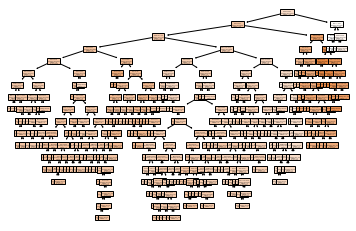

In [245]:
plot_tree(DT, feature_names=x.columns, filled=True)
plt.savefig('DT-without_hyper.png')

In [280]:
DT.feature_importances_

array([1.83954371e-03, 2.15704527e-04, 1.34574314e-04, 7.68520435e-01,
       1.23338234e-02, 1.68369736e-01, 2.61731038e-03, 2.18384412e-03,
       3.26029865e-03, 3.29481774e-03, 6.63280224e-03, 3.19961381e-03,
       2.73974969e-02])

### Hyperparameter Tunning for DT

In [253]:
DT_reg = DecisionTreeRegressor()

In [257]:
hyperparameter =   {'criterion' : ['mse','mae'],
                    'max_depth' : np.arange(3,30),
                    'min_samples_split' : np.arange(2,20),
                    'min_samples_leaf' : np.arange(2,20)}

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

DT_rs_cv = RandomizedSearchCV(DT_reg, hyperparameter, cv=5)

DT_rs_cv.fit(x_train, y_train)

DT_rs_cv.best_estimator_

C:\Users\sai\anaconda3\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\sai\anaconda3\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\sai\anaconda3\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\sai\anaconda3\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\sai\anaconda3\lib\site-packages\sklearn\tree\_classes.py:404: F

C:\Users\sai\anaconda3\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\sai\anaconda3\lib\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mae', max_depth=13, min_samples_leaf=11,
                      min_samples_split=10)

In [258]:
# Evaluate Training Dta

y_pred_train = DT_rs_cv.predict(x_train)

MSE = mse(y_train, y_pred_train)
print('MSE :', MSE)

RMSE = np.sqrt(MSE)
print('RMSE :', RMSE)

MAE= mae(y_train, y_pred_train)
print('MAE :', MAE)

r2= r2_score(y_train, y_pred_train)
print('r2 :', r2)

MSE : 4.18072405095917
RMSE : 2.044681894808865
MAE : 1.0925260665584478
r2 : 0.9732400440036727


### Training >>> r2_LR=0.972, r2_KNN= 0.916, KNN_ns = 0.958, KNN_std= 0.963, DT= 1.0, DT_hype=0.973

In [259]:
# Evaluate Testing Data

y_pred_test = DT_rs_cv.predict(x_test)

MSE = mse(y_test, y_pred_test)
print('MSE :', MSE)

RMSE = np.sqrt(MSE)
print('RMSE :', RMSE)

MAE= mae(y_test, y_pred_test)
print('MAE :', MAE)

r2= r2_score(y_test, y_pred_test)
print('r2 :', r2)

MSE : 6.086839400223476
RMSE : 2.4671520829133082
MAE : 1.3603688567434091
r2 : 0.9625421355610974


### Testing >>> LR_r2=0.962, KNN_r2= 0.863, KNN_NS = 0.898, KNN_std= 0.904, DT=0.963, DT_hyper=0.963

# Pruning

In [262]:
#pending

# We are select DT with hyper parameter for prediction because of the accuracy (r2_score) is greater.

In [266]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [269]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [274]:
CRIM = 0.00632
ZN= 18
INDUS= 2.31
CHAS= 0
NOX= 0.538
RM= 6.575
AGE= 65.2
DIS= 4.09
RAD= 1
TAX= 296
PTRATIO= 15.3
B= 396.9
LSTAT= 4.98

In [275]:
arr= np.array([[CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT]])
arr

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [276]:
predict = DT_rs_cv.predict(arr)
predict

C:\Users\sai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([26.85])

In [277]:
import pickle as pkl

In [282]:
with open('model_DT_with_hyp.pkl','wb') as f:
    pkl.dump(DT_rs_cv,f)